In [2]:
!pip install pandas
!pip install plotly
!pip install matplotlib

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/Users/Yudi/Documents/DUKE/Duke_Spring2022/Fintech533/interactive_trader/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Yudi/Documents/DUKE/Duke_Spring2022/Fintech533/interactive_trader/venv/bin/python -m pip install --upgrade pip' command.
  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 65 kB 912 kB/s eta 0:00:01
     |████████████████████████████████| 930 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/Yudi/Documents/DUKE/Duke_Spring2022/Fintech533/interactive_trader/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1 Import historical price data

Read in the data file

In [16]:
df = pd.read_csv("sakura_data.csv")
col = list(df.columns)
# df.head()

['Date', 'hlt_Open', 'hlt_High', 'hlt_Low', 'hlt_Close', 'hlt_Volume', 'hlt_TWAP', 'hlt_VWAP', 'hlt_PreviousCloseDate']
['Date', 'mar_Open', 'mar_High', 'mar_Low', 'mar_Close', 'mar_Volume', 'mar_TWAP', 'mar_VWAP', 'mar_PreviousCloseDate']


Read Marriott and Hilton's data into different Data frame

In [18]:
col_mar = col[:9]
col_hlt = col[-8:]
col_hlt.insert(0,"Date")
df_mar = pd.read_csv("sakura_data.csv",usecols=col_mar)
df_hlt = pd.read_csv("sakura_data.csv",usecols=col_hlt)
# print(df_mar.head())
# print(df_hlt.head())

         Date  mar_Open  mar_High  mar_Low  mar_Close  mar_Volume    mar_TWAP  \
0  2022-04-14    154.46    157.33  153.900     155.58     2351189  156.193286   
1  2022-04-13    146.41    154.28  145.670     153.93     2502524  152.220619   
2  2022-04-12    145.00    146.95  143.855     144.88     1698245  145.151792   
3  2022-04-11    144.30    147.19  143.630     143.70     1165117  144.762850   
4  2022-04-08    144.71    147.05  143.835     145.48     1646722  145.905663   

     mar_VWAP mar_PreviousCloseDate  
0  156.097372            2022-04-13  
1  152.227673            2022-04-12  
2  145.136644            2022-04-11  
3  144.639514            2022-04-08  
4  145.688317            2022-04-07  
         Date  hlt_Open  hlt_High  hlt_Low  hlt_Close  hlt_Volume    hlt_TWAP  \
0  2022-04-14    176.20    181.52   176.20     180.51     3631673  179.825305   
1  2022-04-13    164.16    176.25   164.01     175.54     3343813  173.458879   
2  2022-04-12    164.63    165.96   162.28

## Step 2 Set parameters
x, threshold

In [29]:
x = 1
THRESHOLD = 1.5

## Step 3 Calculate Spread, Standard Deviation of spread and Long Term Mean

In [44]:
spread = np.log(df.mar_Close/df.hlt_Close**x)
print(spread)
print(type(spread))
window_size = 250
std_spread = pd.Series(spread[1:]).rolling(window_size).std(ddof=1)
std_spread = np.asarray(std_spread[window_size-1:-1])
# print(std_spread)
lt_mean_spread = pd.Series(spread[1:]).rolling(window_size).mean()
lt_mean_spread = np.asarray(lt_mean_spread[window_size-1:-1])
# print(lt_mean_spread)
# print(type(std_spread))
# lt_mean_spread

0      -0.148626
1      -0.131369
2      -0.119316
3      -0.122642
4      -0.118974
          ...   
1326   -0.367414
1327   -0.359108
1328   -0.355383
1329   -0.350414
1330   -1.102620
Length: 1331, dtype: float64
<class 'pandas.core.series.Series'>


array([-0.11013727, -0.11025503, -0.11037393, ..., -0.46884207,
       -0.46817015, -0.46749999])

## Step 4 Calculate Entry Signal

In [51]:
low = lt_mean_spread - THRESHOLD * std_spread
go_down = spread[:len(lt_mean_spread)] < low
high = lt_mean_spread + THRESHOLD * std_spread
go_up = spread[:len(lt_mean_spread)] > low
high


array([-0.07142118, -0.07129309, -0.07124783, ..., -0.40859982,
       -0.40719827, -0.40569821])

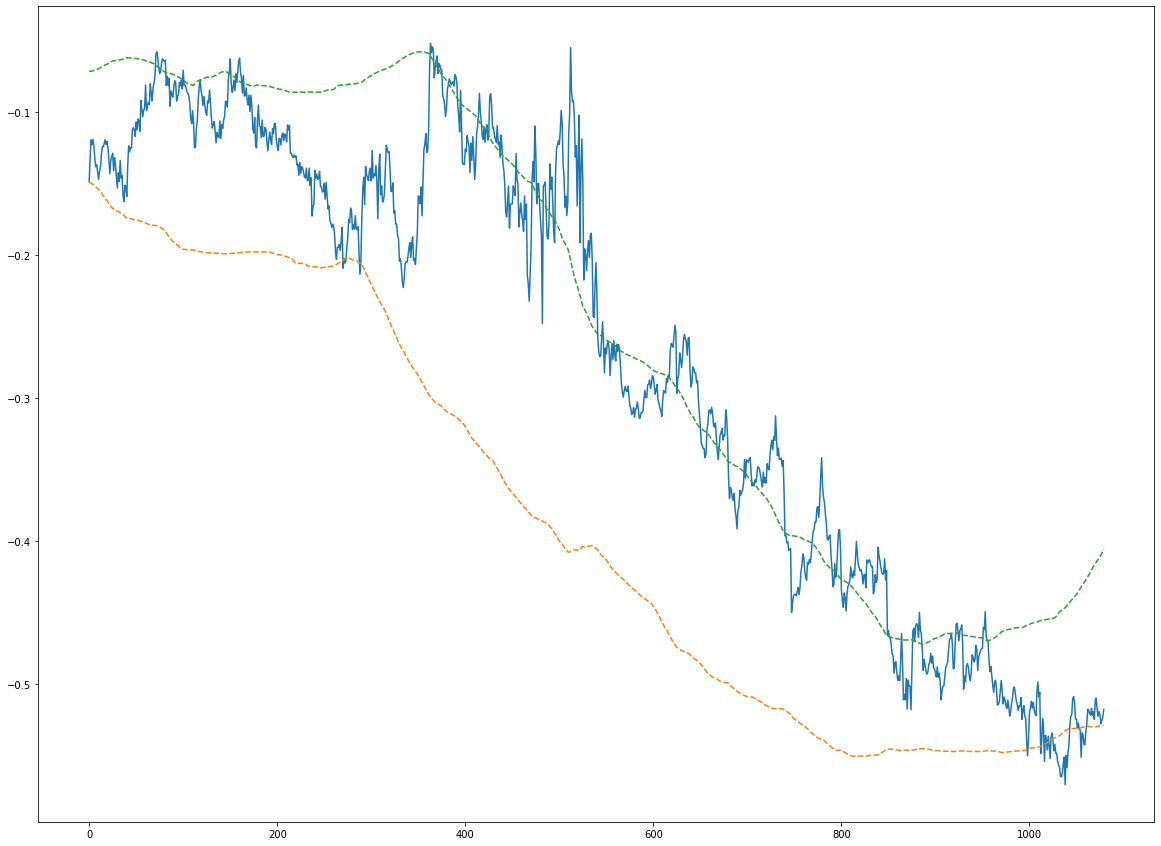

In [53]:
plt.figure(figsize=(20,15))
plt.plot(spread[:len(lt_mean_spread)])
plt.plot(low, linestyle='--')
plt.plot(high,linestyle='--')

## Step 5 Output as a Blotter
Reference: <a href="https://pypi.org/project/QTPyLib/" target="_blank">QTPyLib 1.5.83</a>.

In [26]:
!pip install blotter

You should consider upgrading via the '/Users/Yudi/Documents/DUKE/Duke_Spring2022/Fintech533/interactive_trader/venv/bin/python -m pip install --upgrade pip' command.
